<a href="https://colab.research.google.com/github/Charlestonjm21/pytorch-tutorial/blob/main/Simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [137]:
# create a Model class that inherits nn.Module
class Model(nn.Module):
# Input layer (4 features of the flower)
# Hidden layer1 (number of nuerons)
# H2 (n) -->
# output (3 classes of iris flowers)
    def __init__(self, in_features = 4, h1 = 8, h2 = 8, out_features = 3):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x


In [138]:
# picking a manual seeed for randamization
torch.manual_seed(41)
# create an instance of modul
model = Model()

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [140]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [141]:
my_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [142]:
# change last column from strings to integers
my_df['species'] = my_df['species'].replace({
    'setosa': 0.0,
    'versicolor': 1.0,
    'virginica': 2.0
})
my_df

/tmp/ipython-input-3838710281.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace({


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [143]:
# Train test splits! set X, y
X = my_df.drop('species', axis = 1)
y = my_df['species']

In [144]:
# convert these to numpy arrays
X = X.values
y = y.values

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

In [147]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [148]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [149]:
# Set the criterion of model to measure the error, how far off the predictions are from criterion
criterion = nn.CrossEntropyLoss()
# choose Adam optimizer, lr = learning rate (if error doesnt go down after a bunch of iteration(epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [150]:
# Train our model
# Epochs? (one run thru all the training data in our network)
epoch = 100
losses = []
for i in range(epoch):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # measure the loss/error, gonna be high at first
  # Calculate the loss
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # keep track of our losses
  losses.append(loss.detach().numpy())

  # Print out every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and Loss: {loss}')
  # Do some back propagation: take the error rate of forward propagation and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



Epoch: 0 and Loss: 1.1318050622940063
Epoch: 10 and Loss: 0.9658581614494324
Epoch: 20 and Loss: 0.6791526675224304
Epoch: 30 and Loss: 0.40087202191352844
Epoch: 40 and Loss: 0.22570070624351501
Epoch: 50 and Loss: 0.12255845963954926
Epoch: 60 and Loss: 0.07509137690067291
Epoch: 70 and Loss: 0.05467576906085014
Epoch: 80 and Loss: 0.04448389261960983
Epoch: 90 and Loss: 0.03846167027950287


Text(0.5, 0, 'Epoch')

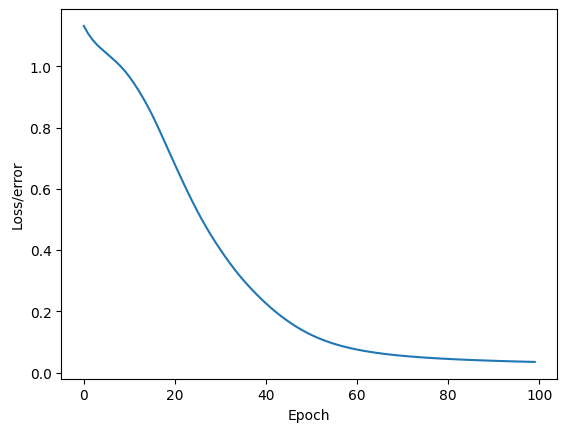

In [151]:
# Graph it out
plt.plot(range(epoch), losses)
plt.ylabel('Loss/error')
plt.xlabel('Epoch')
